In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
plt.rc('figure', figsize=(10, 5))

In [3]:
#alterar eleitores por eleição

eleitores = 147165834

In [5]:
df = pd.read_csv('votacao_candidato_munzona_2018_BR.csv', sep = ';', encoding='latin-1')

In [6]:
df.sample(1)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
36698,08/02/2020,18:46:11,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,GO,BR,BRASIL,93580,CAMPO LIMPO DE GOIÁS,144,1,Presidente,280000614517,17,JAIR MESSIAS BOLSONARO,JAIR BOLSONARO,#NULO#,12,APTO,2,DEFERIDO,Coligação,17,PSL,Partido Social Liberal,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,6,2º TURNO,N,2478


In [7]:

droplist = ['NM_TIPO_ELEICAO','DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO', 
            'DT_ELEICAO', 'SG_UF', 'NM_UE', 'CD_MUNICIPIO', 'NM_MUNICIPIO' ,
            'CD_CARGO', 'NM_PARTIDO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
            'NM_SOCIAL_CANDIDATO','CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
            'CD_DETALHE_SITUACAO_CAND', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 
            'CD_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO', 'DS_DETALHE_SITUACAO_CAND', 'CD_ELEICAO', 
            'DS_ELEICAO', 'TP_ABRANGENCIA']




In [8]:
df = df.drop(droplist, axis = 1)

In [9]:
df.sample(2)

,ANO_ELEICAO,NR_TURNO,SG_UE,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
90294,2018,1,BR,22,Presidente,CIRO GOMES,Coligação,12,PDT,NÃO ELEITO,3533
68028,2018,2,BR,64,Presidente,FERNANDO HADDAD,Coligação,13,PT,NÃO ELEITO,7542


### Filtro por Cargo

In [10]:
dfpresidente = df[df.DS_CARGO == 'Presidente']

# Primeiro Turno

In [11]:
#Escolher Turno
dfpresidente1turno = dfpresidente[dfpresidente.NR_TURNO == 1]
#Grupar por
votostotais1turno = dfpresidente1turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais1turno['Porcentagem'] = votostotais1turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais1turno = votostotais1turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v1 = votostotais1turno.QT_VOTOS_NOMINAIS.sum()

In [12]:
#Criação de Outros e mostrando somente os 5 primeiros

outros1 = votostotais1turno.QT_VOTOS_NOMINAIS[5:100].sum()
outros1p = votostotais1turno.Porcentagem[5:100].sum()

votostotais1turno = votostotais1turno[0:5].append({'SG_PARTIDO' : 'Outros' , 'NM_URNA_CANDIDATO' : 'Outros', 'QT_VOTOS_NOMINAIS' : outros1, 'Porcentagem' : outros1p } , ignore_index=True)

votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSL,JAIR BOLSONARO,49277010,33.484001
1,PT,FERNANDO HADDAD,31342051,21.297097
2,PDT,CIRO GOMES,13344371,9.067574
3,PSDB,GERALDO ALCKMIN,5096350,3.462998
4,NOVO,JOÃO AMOÊDO,2679745,1.820902
5,Outros,Outros,5311222,3.609005


([<matplotlib.patches.Wedge at 0x1c96ab4d888>,
 [Text(-0.8310008038015291, -0.7207202398165413, 'Votos Totais'),
  Text(0.9065464786460861, 0.786240091864045, 'Não Votaram')],
 [Text(-0.4532731657099249, -0.39312013080902247, '72.7%'),
  Text(0.5288187792102168, 0.4586400535873595, '27.3%')])

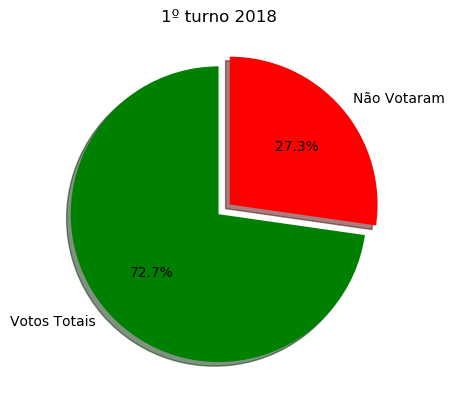

In [13]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = 'Votos Totais', 'Não Votaram'
sizes = [v1, (eleitores-v1)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('1º turno 2018')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)


([<matplotlib.patches.Wedge at 0x1c96aa5cb88>,
 [Text(-1.1906856519491147, 0.1492235847395191, 'JAIR BOLSONARO'),
  Text(0.6834607025577435, -0.8619057187762916, 'FERNANDO HADDAD'),
  Text(1.0083755576540514, 0.43952102876413185, 'CIRO GOMES'),
  Text(0.8118293733330044, 1.1405845293505175, 'GERALDO ALCKMIN'),
  Text(0.5327504603225208, 1.294672525014006, 'JOÃO AMOÊDO'),
  Text(0.21733113443240887, 1.383028263632498, 'Outros')],
 [Text(-0.6945666303036501, 0.0870470910980528, '46.0%'),
  Text(0.37279674684967823, -0.4701303920597954, '29.3%'),
  Text(0.5500230314476644, 0.2397387429622537, '12.5%'),
  Text(0.52189031142836, 0.7332329117253326, '4.8%'),
  Text(0.3424824387787634, 0.8322894803661467, '2.5%'),
  Text(0.13971287213512, 0.8890895980494629, '5.0%')])

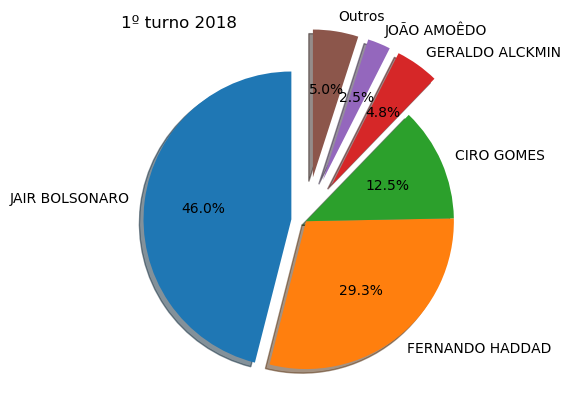

In [14]:
#Grafico de Pizza
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()
labels = votostotais1turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.1, 0.0, 0.0, 0.3, 0.3, 0.3)

plt.pyplot.title('1º turno 2018', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)


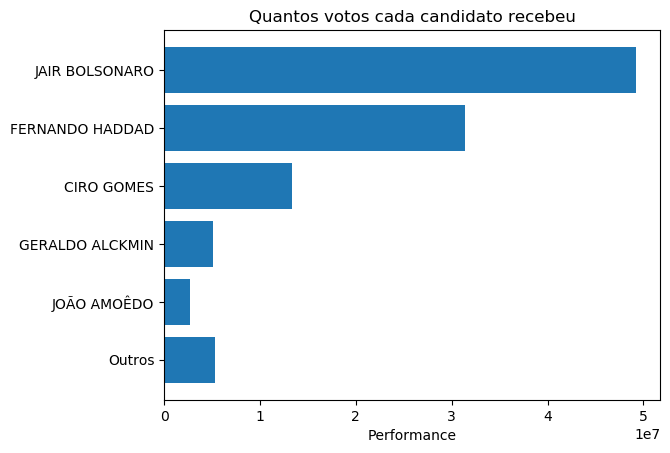

In [15]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais1turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais1turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

# Segundo Turno

In [16]:
#Escolher Turno
dfpresidente2turno = dfpresidente[dfpresidente.NR_TURNO == 2]
#Grupar por
votostotais2turno = dfpresidente2turno.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS'].sum().reset_index()
#Coluna Porcentagem
votostotais2turno['Porcentagem'] = votostotais2turno['QT_VOTOS_NOMINAIS']/eleitores * 100
#Ordenar
votostotais2turno = votostotais2turno.sort_values(by='QT_VOTOS_NOMINAIS',ascending = False)
#Votos Totais 1 Turno
v2 = votostotais2turno.QT_VOTOS_NOMINAIS.sum()

([<matplotlib.patches.Wedge at 0x1c96c5fc9c8>,
 [Text(-0.8640942228072418, -0.6806916879991622, 'Votos Totais'),
  Text(0.942648104013072, 0.7425729270587239, 'Não Votaram')],
 [Text(-0.4713241215312227, -0.3712863752722703, '71.2%'),
  Text(0.5498780606742919, 0.4331675407842556, '28.8%')])

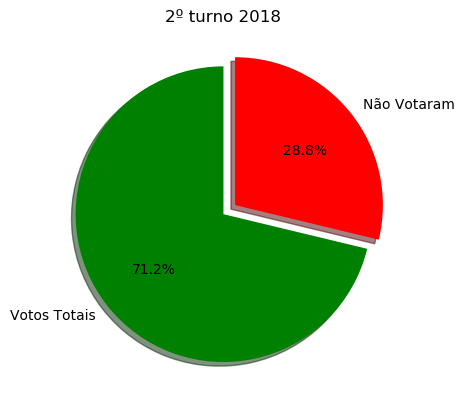

In [17]:
#Grafico de Pizza

labels = 'Votos Totais', 'Não Votaram'
sizes = [v2, (eleitores-v2)]
explode = (0.0, 0.1)
colors = ('g','r')
plt.pyplot.title('2º turno 2018')
plt.pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)

([<matplotlib.patches.Wedge at 0x1c96c64e308>,
 [Text(-1.0857440543428687, -0.17652152406749091, 'JAIR BOLSONARO'),
  Text(1.1844480592831295, 0.19256893534635358, 'FERNANDO HADDAD')],
 [Text(-0.5922240296415647, -0.09628446767317685, '55.1%'),
  Text(0.6909280345818255, 0.11233187895203958, '44.9%')])

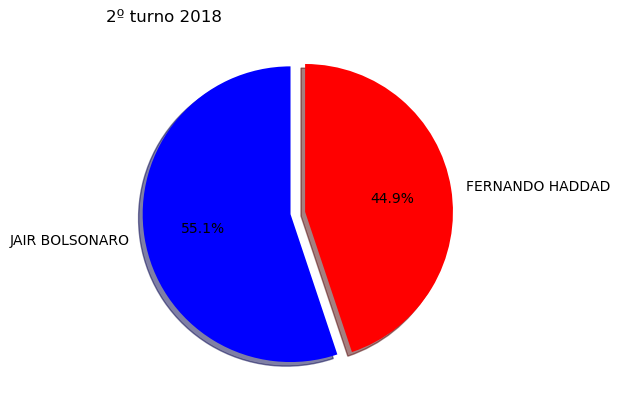

In [18]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1)
colors = ('b','r')

plt.pyplot.title('2º turno 2018', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

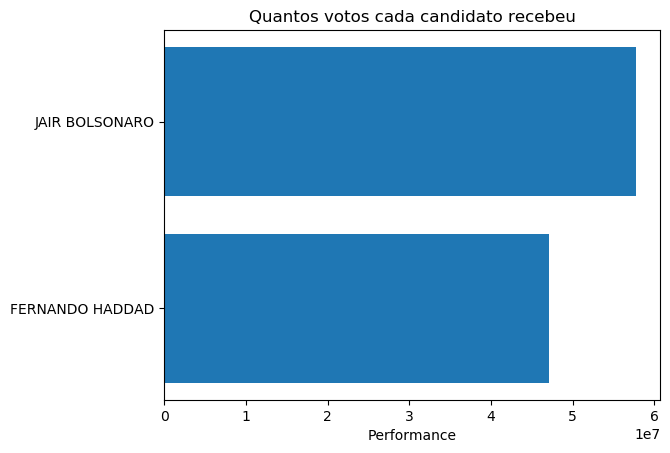

In [19]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

In [20]:
votostotais2turno = votostotais2turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v2), 
                                              'Porcentagem' : 100-votostotais2turno.Porcentagem.sum() } , ignore_index=True)
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSL,JAIR BOLSONARO,57797847,39.273957
1,PT,FERNANDO HADDAD,47040906,31.964556
2,Não Votaram,Não Votaram,42327081,28.761486


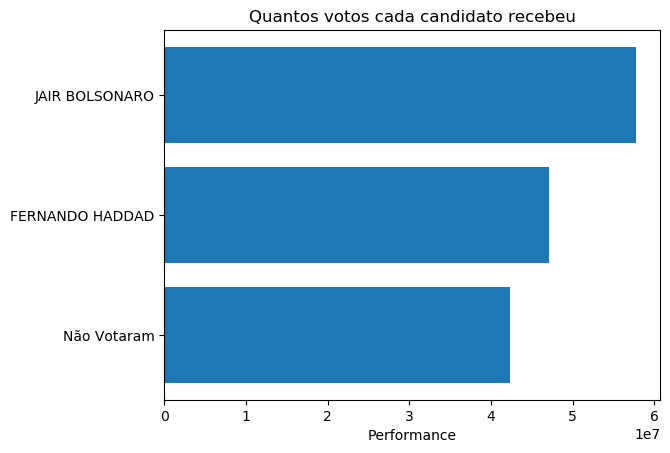

In [21]:
plt.pyplot.rcdefaults()
fig, ax = plt.pyplot.subplots()

y_pos = votostotais2turno.NM_URNA_CANDIDATO.tolist()
performance = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Quantos votos cada candidato recebeu')
#for i, v in enumerate(y_pos):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.pyplot.show()

([<matplotlib.patches.Wedge at 0x1c96cc496c8>,
 [Text(-1.0381374266673289, 0.36369036741785815, 'JAIR BOLSONARO'),
  Text(0.38914588954400947, -1.1351499798048723, 'FERNANDO HADDAD'),
  Text(0.942648104013072, 0.7425729270587239, 'Não Votaram')],
 [Text(-0.5662567781821793, 0.19837656404610443, '39.3%'),
  Text(0.2270017689006722, -0.6621708215528421, '32.0%'),
  Text(0.5498780606742919, 0.4331675407842556, '28.8%')])

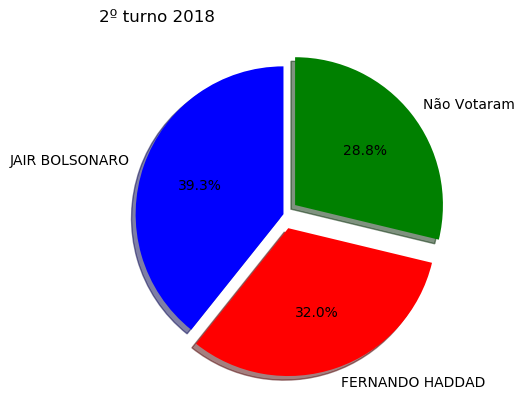

In [22]:
#Grafico de Pizza

labels = votostotais2turno.NM_URNA_CANDIDATO.tolist()
sizes = votostotais2turno.QT_VOTOS_NOMINAIS.tolist()
explode = (0.0, 0.1, 0.1)
colors = ('b','r','g')

plt.pyplot.title('2º turno 2018', loc='left')
plt.pyplot.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, colors = colors)

In [23]:
votostotais1turno = votostotais1turno.append({'SG_PARTIDO' : 'Não Votaram' , 'NM_URNA_CANDIDATO' : 'Não Votaram', 'QT_VOTOS_NOMINAIS' : (eleitores-v1), 
                                              'Porcentagem' : 100-votostotais1turno.Porcentagem.sum() } , ignore_index=True)
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem
0,PSL,JAIR BOLSONARO,49277010,33.484001
1,PT,FERNANDO HADDAD,31342051,21.297097
2,PDT,CIRO GOMES,13344371,9.067574
3,PSDB,GERALDO ALCKMIN,5096350,3.462998
4,NOVO,JOÃO AMOÊDO,2679745,1.820902
5,Outros,Outros,5311222,3.609005
6,Não Votaram,Não Votaram,40115085,27.258423


# Salvar os Arquivos CSV

In [24]:
votostotais1turno['Ano'] = 2018
votostotais1turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PSL,JAIR BOLSONARO,49277010,33.484001,2018
1,PT,FERNANDO HADDAD,31342051,21.297097,2018
2,PDT,CIRO GOMES,13344371,9.067574,2018
3,PSDB,GERALDO ALCKMIN,5096350,3.462998,2018
4,NOVO,JOÃO AMOÊDO,2679745,1.820902,2018
5,Outros,Outros,5311222,3.609005,2018
6,Não Votaram,Não Votaram,40115085,27.258423,2018


In [25]:
votostotais1turno.to_csv('1turno_2018.csv')

In [26]:
votostotais2turno['Ano'] = 2018
votostotais2turno

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,Porcentagem,Ano
0,PSL,JAIR BOLSONARO,57797847,39.273957,2018
1,PT,FERNANDO HADDAD,47040906,31.964556,2018
2,Não Votaram,Não Votaram,42327081,28.761486,2018


In [27]:
votostotais2turno.to_csv('2turno_2018.csv')